In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x = [1,1, 10, 10]
y = [1,5, 1, 5]


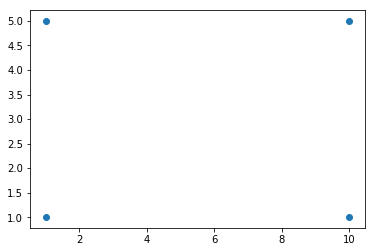

In [3]:
df = pd.DataFrame(list(zip(x,y)), columns=['x', 'y'])
plt.scatter(df.x, df.y)
plt.show()

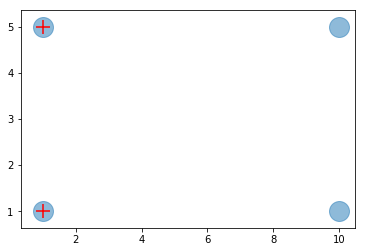

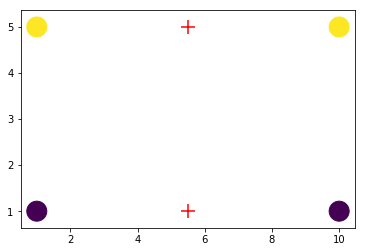

In [4]:
#2
df = pd.DataFrame(list(zip(x,y)), columns=['x', 'y'])
centroid = df.sample(2).reset_index(drop=True)
centroid_hold = centroid.copy()
plt.scatter(df.x, df.y, s=400, alpha=.5)
plt.scatter(centroid.x, centroid.y, s=200,  c='r', marker='+')
plt.show()   

while True :
    df['dist1'] = np.sqrt(np.square(centroid.loc[0].x - df.x) + np.square(centroid.loc[0].y - df.y))
    df['dist2'] = np.sqrt(np.square(centroid.loc[1].x - df.x) + np.square(centroid.loc[1].y - df.y))
    df['grp'] = np.where(df.dist1<=df.dist2, 'dist1', 'dist2')
    centroid =  df.groupby('grp')[['x', 'y']].mean().reset_index(drop=True)
    if centroid.equals(centroid_hold) :
        break
    centroid_hold = centroid.copy()
    plt.scatter(df.x, df.y, c=df.grp.str[4:].astype(int), s=400)
    plt.scatter(centroid.x, centroid.y, s=200,  c='r', marker='+')    
    plt.show()


In [5]:
df

,x,y,dist1,dist2,grp
0,1,1,4.500000,6.020797,dist1
1,1,5,6.020797,4.500000,dist2
2,10,1,4.500000,6.020797,dist1
3,10,5,6.020797,4.500000,dist2
